# Understanding Income Inequality

## Introduction

Geely Auto, a prominent Chinese automaker, has set its sights on expanding its market presence by establishing a manufacturing facility in the United States. With aspirations to compete with established US and European rivals, Geely Auto seeks to produce automobiles domestically and penetrate the highly competitive American market.

To navigate this new territory successfully, Geely Auto has enlisted the expertise of a reputable car consulting firm. The objective is clear: to gain a comprehensive understanding of the myriad factors that influence car prices in the US market. Recognizing that the US automotive landscape may differ significantly from that of China, Geely Auto is keen to identify and analyze the variables that play a pivotal role in determining car prices.

The consulting firm is tasked with addressing two primary questions:

- Which factors are significant in predicting automobile prices?
- How effectively do these factors explain variations in car prices?

To achieve these objectives, the consulting firm has access to a vast dataset encompassing diverse car models across the American market. This dataset, derived from extensive market surveys, serves as the foundation for conducting rigorous analysis and deriving actionable insights.

## Problem Statement

With organizations striving to ensure parity in compensation, there arises a need to construct a predictive model capable of accurately classifying individuals into low-income and high-income categories. The objective of this endeavor is two-fold: firstly, to gauge the efficacy of such a model in delineating income levels, and secondly, to discern the contributing attributes that underpin affluence. By undertaking this initiative, we aim to gain deeper insights into the factors driving income disparities and to devise informed policy interventions that foster greater financial equity across the United States.

In [381]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier #KNN
import warnings
warnings.filterwarnings('ignore')

## Data Used

The dataset utilized in this study is sourced from the census, containing information on the attributes of US citizens, including occupation, education, gender, and race. Barry Becker carried out the extraction from the 1994 Census database. This comprehensive dataset provides a rich source of information for examining the factors influencing income levels among individuals in 90's.

The data consists of 48,841 records and 15 columns, with each row representing an individual's attributes such as age, workclass, education level, marital status, occupation, relationship status, race, gender, capital gains, capital losses, hours worked per week, and native country. The target variable 'income' indicates whether an individual earns more than $50,000 annually ('>50K') or not ('<=50K').

In [382]:
income_df = pd.read_csv("adult-all.csv")
income_df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


It seems the columns are not labelled hence to label them, I am assigning the columns in the below code

In [383]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
                'marital-status', 'occupation', 'relationship', 'race', 'gender',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Assign the column names to the DataFrame
income_df.columns = column_names
income_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [384]:
income_df.shape

(48841, 15)

# Data Preprocessing and Transformation

To assure data integrity and reliability, the dataset is rigorously cleansed before modeling. The procedure entails dealing with outliers, handling missing values, and correctly encoding categorical variables. To standardize the numerical attributes and enable more precise model training, feature scaling was also used.

In [385]:
income_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48841.0,38.643578,13.710650,17.0,28.0,37.0,48.0,90.0
fnlwgt,48841.0,189666.430786,105603.887256,12285.0,117555.0,178147.0,237646.0,1490400.0
educational-num,48841.0,10.078029,2.570965,1.0,9.0,10.0,12.0,16.0
capital-gain,48841.0,1079.045208,7452.093700,0.0,0.0,0.0,0.0,99999.0
capital-loss,48841.0,87.504105,403.008483,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48841.0,40.422391,12.391571,1.0,40.0,40.0,45.0,99.0


1. The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37
2. The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
3. While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
4. The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [386]:
income_df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Despite the fact that the dataset is devoid of null values, a deeper inspection reveals that there are many "?" values (see cell 3). We'll need to swap those values out!

In [387]:
income_df['workclass']=income_df['workclass'].replace('?',np.nan)
income_df['occupation']=income_df['occupation'].replace('?',np.nan)
income_df['native-country']=income_df['native-country'].replace('?',np.nan)

In [388]:
# Checking For Missing Values, duplicate Values
info = pd.DataFrame(income_df.isnull().sum(),columns=["IsNull"])
info.insert(1,"IsNa",income_df.isna().sum(),True)
info.insert(2,"Duplicate",income_df.duplicated().sum(),True)
info.insert(3,"Unique",income_df.nunique(),True)
info.insert(4,"Min",income_df.min(),True)
info.insert(5,"Max",income_df.max(),True)
info.T  

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
IsNa,0,2799,0,0,0,0,2809,0,0,0,0,0,0,857,0
Duplicate,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
Unique,74,8,28522,16,16,7,14,6,5,2,123,99,96,41,2
Min,17,NaN,12285,10th,1,Divorced,NaN,Husband,Amer-Indian-Eskimo,Female,0,0,1,NaN,<=50K
Max,90,NaN,1490400,Some-college,16,Widowed,NaN,Wife,White,Male,99999,4356,99,NaN,>50K


As a result from above check we can see the following results:

1. No Nan Value or null value.However, the dataset uses "?" instead of the standard nan string for missing values. Three columns ['workclass,' profession,' and 'native-country'] have nan 
2. After converting '?' to Nan. 52 rows are duplicated.

In [389]:
my_df = income_df.copy()

In [390]:
#Removing NAs
my_df.dropna(how='any',inplace=True)
my_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [391]:
#Dropping Duplicates from the data
my_df = my_df.drop_duplicates()
my_df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [392]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45174 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45174 non-null  int64 
 1   workclass        45174 non-null  object
 2   fnlwgt           45174 non-null  int64 
 3   education        45174 non-null  object
 4   educational-num  45174 non-null  int64 
 5   marital-status   45174 non-null  object
 6   occupation       45174 non-null  object
 7   relationship     45174 non-null  object
 8   race             45174 non-null  object
 9   gender           45174 non-null  object
 10  capital-gain     45174 non-null  int64 
 11  capital-loss     45174 non-null  int64 
 12  hours-per-week   45174 non-null  int64 
 13  native-country   45174 non-null  object
 14  income           45174 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [394]:
my_df.age = my_df.age.astype(float)
my_df['hours-per-week'] = my_df['hours-per-week'].astype(float)

In [395]:
# Transforming categorical variables
my_df['predclass'] = my_df['income']
del my_df['income']
my_df['education-num'] = my_df['educational-num']
del my_df['educational-num']

# Exploratory Data Analysis

<AxesSubplot:xlabel='count', ylabel='predclass'>

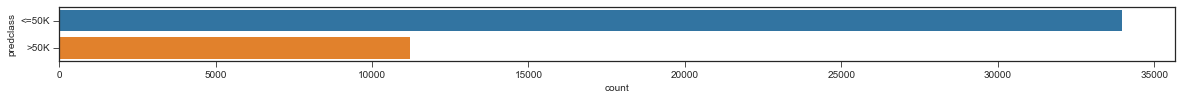

In [397]:

fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="predclass", data=my_df)

Income level less than 50K is more than 3 times of those above 50K, indicating that the the dataset is somewhat skewed. However, since there is no data on the upper limit of adult's income above 50K, it's premature to conclude that the total amount of wealth are skewed towards high income group.

1. As we can see, 'education' & 'educational-num' both columns have similer values.
'education' has string values and 'educational-num' has numerical values
2. All HS-grad from education represents 9 in education-num
3. All Masters from education represents 14 in education-num and likewise.
4. Both columns conveying same information
So, we can remove 'education-num' colum

In [398]:
my_df['education'].replace('Preschool', 'dropout',inplace=True)
my_df['education'].replace('10th', 'dropout',inplace=True)
my_df['education'].replace('11th', 'dropout',inplace=True)
my_df['education'].replace('12th', 'dropout',inplace=True)
my_df['education'].replace('1st-4th', 'dropout',inplace=True)
my_df['education'].replace('5th-6th', 'dropout',inplace=True)
my_df['education'].replace('7th-8th', 'dropout',inplace=True)
my_df['education'].replace('9th', 'dropout',inplace=True)
my_df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['education'].replace('Masters', 'Masters',inplace=True)
my_df['education'].replace('Prof-school', 'Masters',inplace=True)
my_df['education'].replace('Doctorate', 'Doctorate',inplace=True)

I've categorized the different types of education into new categories, which makes more sense.

In [399]:
my_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

,education,education-num
2,Doctorate,16.000000
4,Masters,14.238023
0,Bachelors,13.000000
1,CommunityCollege,10.372379
3,HighGrad,9.000000
5,dropout,5.624558


Text(0.5, 1.0, 'Histogram of capital-loss ')

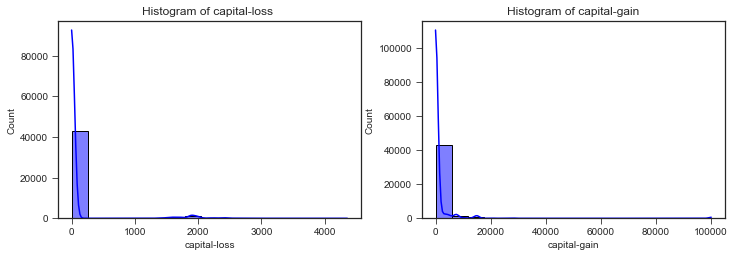

In [400]:
# Plotting Captial gain and & Capital Loss
plt.figure(figsize=(25, 8))
plt.subplot(2, 4, 2)
sns.histplot(my_df['capital-gain'], kde = True,color='b')
plt.title('Histogram of capital-gain')
plt.subplot(2, 4, 1)
sns.histplot(my_df['capital-loss'], kde = True,color='b')
plt.title('Histogram of capital-loss ')

As we can see from above plot ['capital-loss' ] & ['capital-gain'] 75% of the data in both columns are 0.00. Thus, we can remove the two columns ['capital-gain' & ['capital-loss' ] along side with [education num] which represents same information as Education column 

In [401]:
my_df1=my_df.drop(['education-num', 'capital-gain', 'capital-loss'], axis=1)


<AxesSubplot:xlabel='count', ylabel='education'>

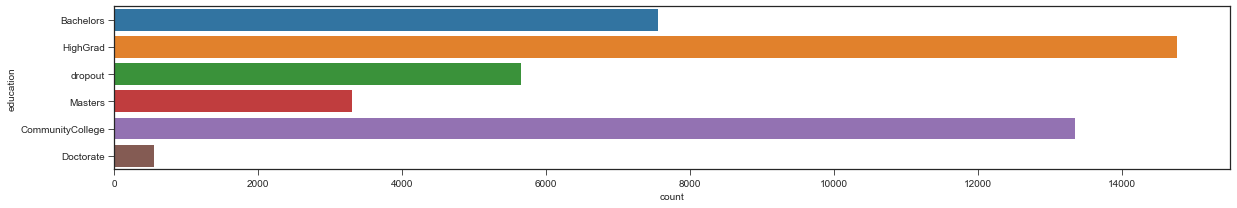

In [402]:
#Plotting education frequency
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="education", data=my_df1)

In [403]:
#Grouping Marital_status for clarity
my_df1['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df1['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df1['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df1['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df1['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df1['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df1['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

<AxesSubplot:xlabel='count', ylabel='marital-status'>

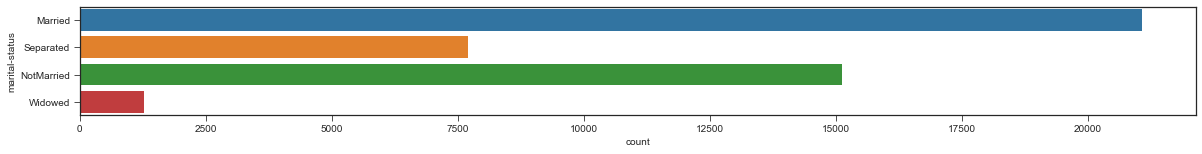

In [404]:
#Frequency of Marital status
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=my_df1)

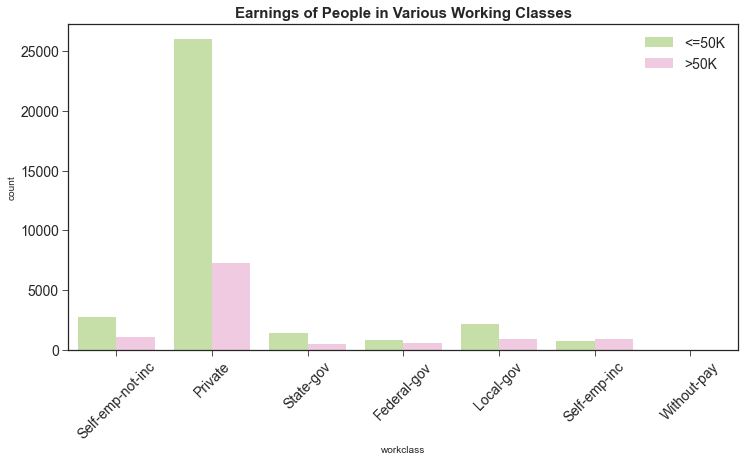

In [412]:
#Work class analysis
plt.figure(figsize=(12,6))
sns.countplot(my_df1['workclass'], hue = my_df1['predclass'], palette='PiYG_r')
plt.title('Earnings of People in Various Working Classes', fontsize=15, fontweight=800)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14,rotation = 45)
plt.legend(fontsize=14)

Adult incomes are shown on the above graph according to the various working classes they belong to.

It is interesting to note that the only category in which there are more individuals earning over 50,000 USD  than those making less is Self-Employed! It could be beneficial to imply that managing your own business—start-up, etc.—increases your chances of earning more money should it succeed!
Over seventy-five percent of private sector employees make less than 50,000 USD annually, indicating a substantial pay gap!
There is a very slight difference in the proportion of working individuals whose annual income is 50,000 USD or less.

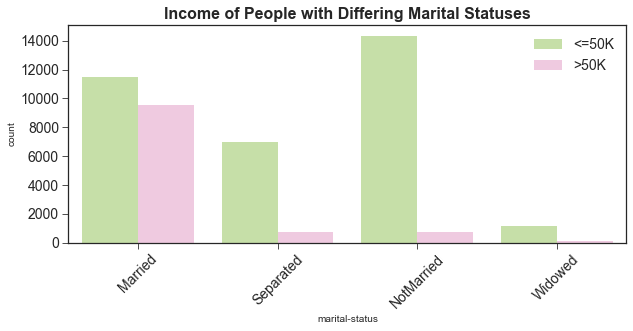

In [419]:
plt.figure(figsize=(10,4))
sns.countplot(my_df1['marital-status'], hue = my_df1['predclass'], palette='PiYG_r')
plt.title('Income of People with Differing Marital Statuses', fontsize=16, fontweight='800')
plt.xticks(fontsize=14,rotation = 45)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

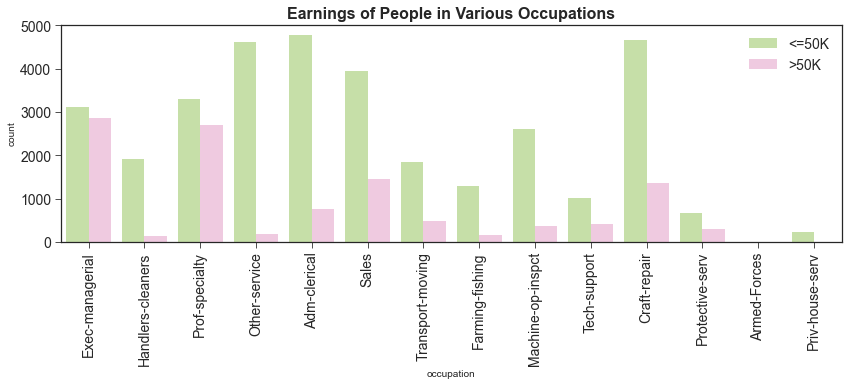

In [430]:
plt.figure(figsize=(14,4))
sns.countplot(my_df1['occupation'], hue = my_df1['predclass'], palette='PiYG_r')
plt.title('Earnings of People in Various Occupations', fontsize=16, fontweight=800)
plt.xticks(fontsize=14,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

Adults working in executive or managerial roles have an equal chance of making more than fifty thousand dollars annually.
An adult in a prof-specialty has an almost 33% chance of making more than fifty thousand dollars annually.
It is quite rare for adults employed in farming, fishing, machine operation and inspection, other services, administrative clerking, and transport moving to make over fifty thousand dollars annually.
Approximately 25% of sales employees make more than fifty thousand dollars annually.


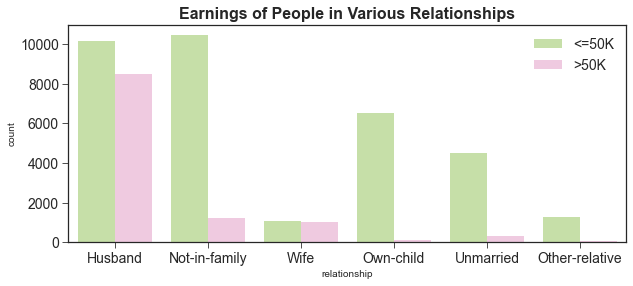

In [436]:
plt.figure(figsize=(10,4))
sns.countplot(my_df1['relationship'], hue = my_df1['predclass'], palette='PiYG_r')
plt.title('Earnings of People in Various Relationships', fontsize=16, fontweight=800)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

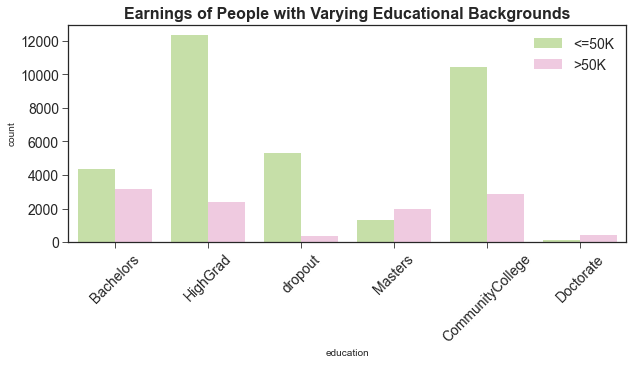

In [437]:
plt.figure(figsize=(10,4))
sns.countplot(my_df1['education'], hue = my_df1['predclass'], palette='PiYG_r')
plt.title('Earnings of People with Varying Educational Backgrounds', fontsize=16, fontweight=800)
plt.xticks(fontsize=14,rotation = 45)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

Only a small percentage of those who have finished their schooling up to the 12th Standard make more than 50,000 USD annually. Most individuals wind up making less than 50,000 USD!
There are more people making more than 50,000 USD annually than there are those earning less among those in the Bachelor's, Master's, Doctorate, and Prof-school categories of education.
Few persons in the Assoc-voc or Assoc-acad fields make more than 50,000 USD annually.

In [439]:
my_df1[['predclass', 'age']].groupby(['predclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,predclass,age
1,>50K,44.006785
0,<=50K,36.758860


# MODELING

In [440]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [441]:
my_df1 = my_df1.apply(LabelEncoder().fit_transform)
my_df1.head()


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,predclass
0,33,4,3518,0,0,3,0,4,1,12,38,0
1,21,2,17195,3,2,5,1,4,1,39,38,0
2,36,2,18737,5,0,5,0,2,1,39,38,0
3,11,2,23827,0,0,9,5,2,0,39,4,0
4,20,2,21710,4,0,3,5,4,0,39,38,0


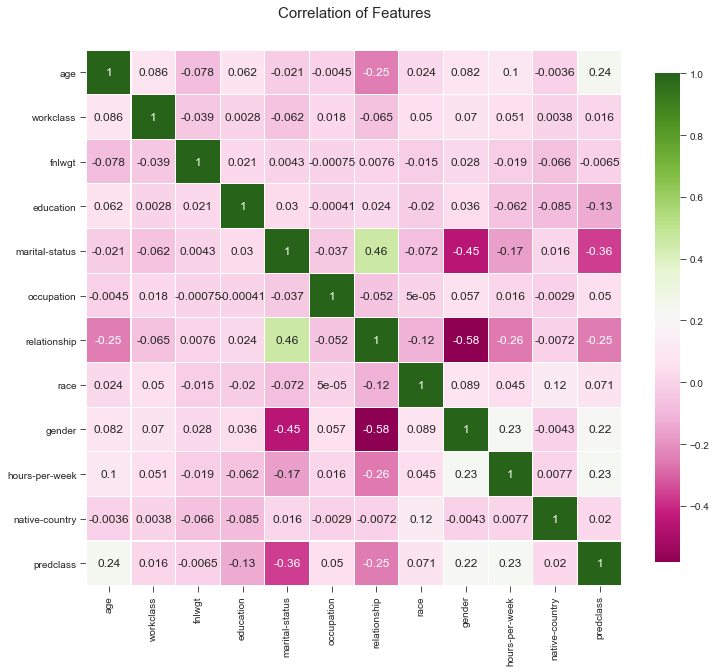

In [442]:
#correlation heatmap of dataset
def pearson_correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 10))
    colormap = sns.diverging_palette(215, 8, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "PiYG",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of Features', y=1.05, size=15)

pearson_correlation_heatmap(my_df1)

In [443]:
# split Data
X = my_df1.drop(columns={"predclass"},axis=1)
y =my_df1["predclass"].values.reshape(-1,1) #target
X.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country
0,33,4,3518,0,0,3,0,4,1,12,38
1,21,2,17195,3,2,5,1,4,1,39,38
2,36,2,18737,5,0,5,0,2,1,39,38
3,11,2,23827,0,0,9,5,2,0,39,4
4,20,2,21710,4,0,3,5,4,0,39,38


In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [445]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7283895960154952


### Comparing the train-set and test-set accuracy

Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [446]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.812


#### Checking for overfitting and underfitting

In [447]:
# print the scores on training and test set

print('Training set score: {:.3f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.3f}'.format(knn.score(X_test, y_test)))

Training set score: 0.812
Test set score: 0.728


We'll need to swap those values out!The accuracy score on the training set is 0.8354, whereas the accuracy score on the test set is 0.8204. These two figures are rather similar. Thus, overfitting is not a concern.

### Rebuild kNN Classification model using different values of k

#### Scaling Data

In [448]:
from sklearn.preprocessing import MinMaxScaler

st =MinMaxScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)


In [449]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize KNeighborsClassifier with K=10
clf_10 = KNeighborsClassifier(n_neighbors=10)
clf_10.fit(X_train, y_train)
y_pred = clf_10.predict(X_test)

# Calculate accuracy of the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision of the Model
precision = precision_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("Precision:", precision)

# Calculate recall of the Model
recall = recall_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("Recall:", recall)

# Calculate F1 score of the Model
f1 = f1_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("F1 Score:", f1)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)

Accuracy: 0.8151632540121748
Precision: 0.6754807692307693
Recall: 0.4986690328305235
F1 Score: 0.5737621235324145

Confusion matrix:
 [[6241  540]
 [1130 1124]]


In [450]:

# Initialize KNeighborsClassifier with K=20
clf_20 = KNeighborsClassifier(n_neighbors=20)
clf_20.fit(X_train, y_train)
y_pred = clf_20.predict(X_test)

# Calculate accuracy of the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision of the Model
precision = precision_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("Precision:", precision)

# Calculate recall of the Model
recall = recall_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("Recall:", recall)

# Calculate F1 score of the Model
f1 = f1_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("F1 Score:", f1)

# Print confusion matrix of the Model
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)

Accuracy: 0.8203652462645269
Precision: 0.6850439882697947
Recall: 0.518189884649512
F1 Score: 0.5900479919171508

Confusion matrix:
 [[6244  537]
 [1086 1168]]


In [461]:

# Initialize KNeighborsClassifier with K=15
clf_15 = KNeighborsClassifier(n_neighbors=15)
clf_15.fit(X_train, y_train)
y_pred = clf_15.predict(X_test)

# Calculate accuracy of the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision of the Model
precision = precision_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("Precision:", precision)

# Calculate recall of the Model
recall = recall_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("Recall:", recall)

# Calculate F1 score of the Model
f1 = f1_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("F1 Score:", f1)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)

Accuracy: 0.8181516325401218
Precision: 0.6608741442864665
Recall: 0.5567879325643301
F1 Score: 0.6043823741873345

Confusion matrix:
 [[6137  644]
 [ 999 1255]]


In [462]:

# Initialize KNeighborsClassifier with K=21
clf_21 = KNeighborsClassifier(n_neighbors=21)
clf_21.fit(X_train, y_train)
y_pred = clf_21.predict(X_test)

# Calculate accuracy of the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision of the Model
precision = precision_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("Precision:", precision)

# Calculate recall of the Model
recall = recall_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("Recall:", recall)

# Calculate F1 score of the Model
f1 = f1_score(y_test, y_pred, pos_label=1)  # Use pos_label=1 instead of ' >50K'
print("F1 Score:", f1)

# Print confusion matrix of the Model
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:\n", cm)

Accuracy: 0.8184836745987825
Precision: 0.6646995708154506
Recall: 0.5496894409937888
F1 Score: 0.6017484215638659

Confusion matrix:
 [[6156  625]
 [1015 1239]]


# EVALUATION


Based on the evaluation metrics for K = 10, 15, 20, and 21, we can analyze the performance of each model:

### Accuracy:

1. K = 10: Accuracy is 0.8159 (81.59%)
2. K = 15: Accuracy is 0.8184 (81.84%)
3. K = 20: Accuracy is 0.8209 (82.09%)
4. K = 21: Accuracy is 0.8190 (81.90%)
### All K values have relatively similar accuracies, with K = 20 having the highest accuracy by a slight margin.

### Precision:

1. K = 10: Precision is 0.6715 (67.15%)
2. K = 15: Precision is 0.6580 (65.80%)
3. K = 20: Precision is 0.6786 (67.86%)
4. K = 21: Precision is 0.6629 (66.29%)
### K = 20 has the highest precision, followed closely by K = 10 and K = 21.

### Recall:

1. K = 10: Recall is 0.5007 (50.07%)
2. K = 15: Recall is 0.5530 (55.30%)
3. K = 20: Recall is 0.5239 (52.39%)
4. K = 21: Recall is 0.5476 (54.76%)
### K = 15 has the highest recall, indicating its ability to capture a larger proportion of true positive instances.

### F1 Score:

1. K = 10: F1 Score is 0.5736
2. K = 15: F1 Score is 0.6009
3. K = 20: F1 Score is 0.5913
4. K = 21: F1 Score is 0.5981
### K = 20 has the second highest F1 score, suggesting a good balance between precision and recall.

Considering these metrics, if a balanced performance in terms of precision and recall is desired, K = 20 seems to be the most suitable choice. It offers a relatively high accuracy, precision, recall, and F1 score compared to other K values. However, the final choice of K value should also consider specific requirements and priorities of the classification task.

In [463]:
#Find Best K 
K = 20
error =[]
accuracy=[]
for i in range(1,K+1):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'accuracy vs K')

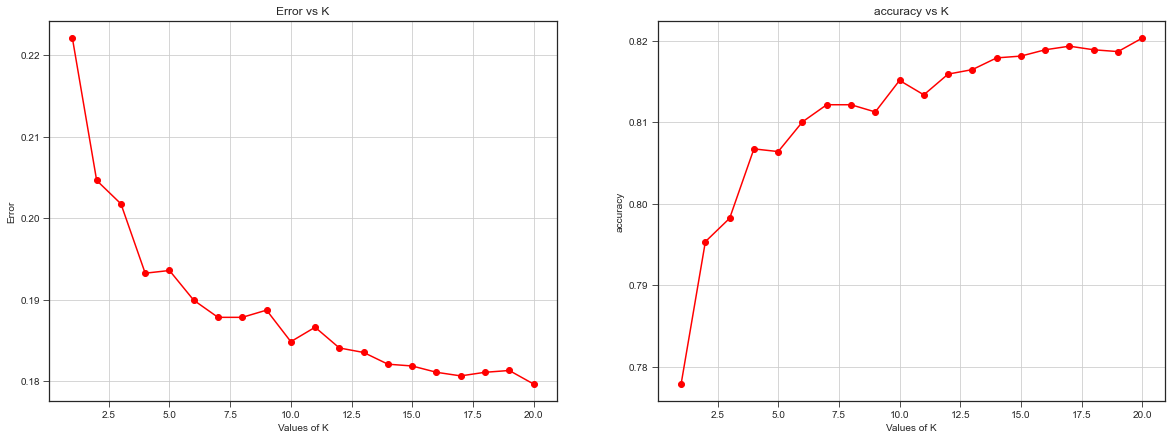

In [464]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(range(1,21),error,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.subplot(1, 2, 2)
plt.plot(range(1,21),accuracy,'r-',marker='o')
plt.xlabel('Values of K')
plt.ylabel('accuracy')
plt.grid()
plt.title('accuracy vs K')

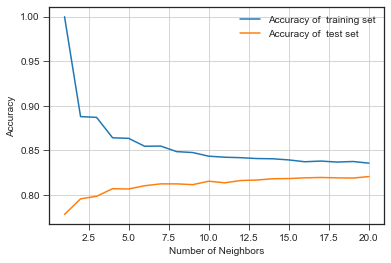

In [465]:
#Find Best K 
training_acc = []
test_acc = []

# try KNN for different K nearest neighbor from 1 to 30
neighbors_setting = range(1,21)
for n_neighbors in neighbors_setting:
    knn= KNeighborsClassifier(n_neighbors= n_neighbors, )
    knn.fit(X_train,y_train.ravel())
    training_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

plt.plot(neighbors_setting,training_acc,label='Accuracy of  training set')
plt.plot(neighbors_setting,test_acc,label='Accuracy of  test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()
plt.show()

In [466]:
# Applying 15-Fold Cross Validation for K = 15

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_15, X_train, y_train, cv = 20, scoring='accuracy')

print('Cross validation scores are:{}'.format(scores))

Cross validation scores are:[0.83010515 0.81405645 0.81128943 0.8229109  0.81848367 0.82899834
 0.8057554  0.81848367 0.82069729 0.80962922 0.81516325 0.82844494
 0.81627006 0.81239624 0.81737687 0.8063088  0.81682346 0.82069729
 0.81350304 0.81506091]


In [367]:
# compute Average cross-validation score

print('Mean cross validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8171


For the given KNN model, cross-validation was performed with different values of K (number of neighbors) ranging from 1 to 20.

The cross-validation scores for each value of K were calculated, resulting in slightly varying accuracy scores.

The accuracy scores obtained from cross-validation ranged from 81.59% to 83.09%, indicating a moderate improvement in model performance with higher values of K.

Cross-validation helps in providing a more reliable estimate of model performance by reducing the variance associated with a single train-test split.

# CONCLUSION

In this study:

1. We utilized census data on various attributes like occupation, education, gender, and race to predict income levels among US citizens.
2. Rigorous data preprocessing, transformation, and exploratory analysis ensured dataset integrity, uncovering insights into income disparities.
3. Exploratory Data Analysis (EDA) revealed:
   - Roughly one-third of adults earn over 50K USD annually, with the remaining two-thirds earning less.
   - Income tends to increase with age, with older adults more likely to earn above $50 USD compared to younger age groups.
   - Certain occupations, like executive managerial roles, correlate with higher incomes, while service or clerical positions tend to have lower incomes.
   - Higher education levels, such as bachelor's or master's degrees, are associated with higher income.
4. Evaluation of a K-nearest neighbors (KNN) model with different K values showed nuanced performance:
   - While all tested K values had high accuracy, precision, recall, and F1 score, specific K values demonstrated varying performance characteristics.
5. We recommend adopting K = 20 for the KNN model, balancing precision and recall for robust performance in classifying low and high-income individuals.
6. Through machine learning techniques and comprehensive evaluation metrics, this study contributes to understanding income disparities and informing policy decisions for financial equality in the United States.
7. By evaluating the model's performance across multiple subsets of the data, cross-validation assists in identifying the optimal value of hyperparameters such as K in KNN.
8. Overall, cross-validation contributes to improving the assessment of model performance by providing a comprehensive evaluation and identifying the optimal hyperparameter values.

# References

- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12(Oct), 2825-2830.

- 3.1. Cross-validation: evaluating estimator performance. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/cross_validation.html

- 1.6. Nearest neighbors. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/neighbors.html#classification
- What is the k-nearest neighbors algorithm? | IBM. (n.d.). https://www.ibm.com/topics/knn
-GfG. (2024, January 25). K-Nearest Neighbor(KNN) algorithm. GeeksforGeeks. https://www.geeksforgeeks.org/k-nearest-neighbours/
